In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from IPython.html.widgets import interact
from mpl_toolkits import mplot3d

# Big Data & Business Intelligence

## Agenda

## Big Data

### History up to the current state of affairs

**As the volume of data has grown over the past 25 years, data comprehension for decision-making has consisted of the same two steps: creating the data warehouse and understanding the contents within the data warehouse.**

The data warehouse and all its incarnations—enterprise data warehouse, data mart, and so on—is essentially an infrastructure of curated data. This data may come from a single data source (e.g., the database of a CRM application) or by integrating a variety of data sources (e.g., integrating the database of a CRM application with a database containing the social media interactions of each customer in the CRM database). This data may be structured (e.g., currency data describing the amount paid by each customer), unstructured (e.g., notes about each interaction between a customer and a service employee in free text form), or semi-structured (e.g., log data generated by a network router). Curated data is data that, once captured, is cleaned, tagged, and profiled both automatically and, more often than people would like to think, manually.

Over the years, we have reduced data warehousing costs through the growing use of open source software, cloud computing, and commodity hardware, while improving our ability to manage more data of greater variety that is created at a higher velocity. We’ve moved from data warehouses costing tens of millions of dollars and being afforded only by the largest corporations, such as financial services institutions like Citibank and retailers like Walmart, to warehouses becoming more affordable to small and mid-sized corporations. More recently, low-cost offerings such as Amazon Redshift, Google BigQuery, and even Microsoft Azure, have moved data warehousing to the cloud. Finally, data warehousing is accessible to the corporate masses.

**As more data has been generated, we have become better managing it cost effectively, but still struggle to efficiently analyze it.**

Driven by the broadening global use of the Internet, the connectivity the Internet affords, new areas like the Internet of Things that yield data in volumes we’ve never seen before, and the applications that are being created to capitalize on this use and connectivity, we find ourselves awash with data. Fast data and slow data, simple data and complex data, and all of it in unprecedented volumes. How much bigger has the data become? We have grown from generating approximately 5 zettabytes of unstructured data in 2014 to a projected approximation of 40 zettabytes of unstructured data in 2020

**We are working to improve our ability to analyze data, but face a shortage of data professionals.**

In order to collect and analyze more data, without giving up on reports, we started employing more broadly the automated information-extraction approaches offered by machine learning and other AI-based data analysis techniques. However, these approaches required the use of a new type of specialized personnel—the data scientists. And even though we are seeing a surge in the number of data scientists in the workforce, we need more, and it is unlikely that we will ever be able to produce as many data scientists as we will need, given the data we are generating. McKinsey has estimated that by 2018, the U.S. will face a shortage of people (a roughly 140K-190K deficit) who possess the deep analytical skills required to extract insights from collected data. We will also be short roughly 1.5 million managers who possess the quantitative skills necessary to make important business decisions based on big data analyses produced by data scientists.

* Summarize Text

#### Challanges of Relational Databases


### Formal Definition(s)
### Basics Concepts

#### Big Data Sources

- Transactions (Business Systems)
- Social Media
- Unstructured Data (Text, images, video)
- Sensor Data

#### Big Data Characteristics

- Volume
- Variaty
- Veracity
- Velocity

### DWH / Distributed Data Storage
### Distributed Algorithms

#### Hadoop & MapReduce

### The Eco-System (Hot Companies and Technologies)

## BI & Data Visualization

### History up to the current state of affairs

**Delivering data “as you like it” with self-service**

When organizations seek the benefits of a data-driven culture, they require more efficient approaches to uncovering answers and insights. Self-service analytics can help address that need for speedy understanding. Self-service analytics provides data access to more people within a company—along with the autonomy to explore connections between disparate data sources.

**With the rise of data warehouses, delivery of data analysis reports has shifted from print to digital.**

The second step in data comprehension involved understanding the data warehouse’s contents through data analysis. In business settings, this was often done through reports and associated visualizations, while occasionally using more bespoke visualizations and machine learning algorithms such as neural networks. (Machine learning is not new, as some believe, but rather has been used almost since the time data warehouses appeared as data storage and management tools.)

As data warehouses became adopted by a broader set of corporations from a variety of industries, we saw a shift in the form of the reports that could be created, in the medium through which reports were presented to analysts and decision-makers, and also in the personnel that would prepare these reports. In the early days (late 80s, early 90s), business intelligence reports were created by specialized IT personnel that were also formulating and issuing to data warehouses the queries necessary for these reports. These reports were canned (i.e., they could be modified, but with great difficulty and only by the same specialized IT personnel that created them) and presented on computer paper. Later on, while still canned, these reports were presented on PCs through specialized reporting programs, and then later on, Web browsers running on a variety of devices, including (most recently) smartphones and tablets. Over the years, the task of query creation and report writing migrated away from IT personnel to business users. However, while queries and associated reports were becoming faster, more flexible and widely used, the primary users of these reports—business analysts—continued to struggle to determine the simplest patterns in the breadth of information included in such reports. 

### Formal Definition(s)?


### Data Visualization

#### Formal Definition(s)

> Visualization is the process that transforms (abstract) data into interactive graphical representations for the purpose of exploration, confirmation, or presentation.

#### Why Visualize Data?

**Why use graphics to visualize data?**

* Figures are richer; provide more information with less clutter and in less space.
* Figures provide the gestalt effect: they give an overview; make structure more visible.
* Figures are more accessible, easier to understand, faster to grasp, more comprehensible, more memorable, more fun, and less formal.

**Anscombe's quartet**

Anscombe's quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

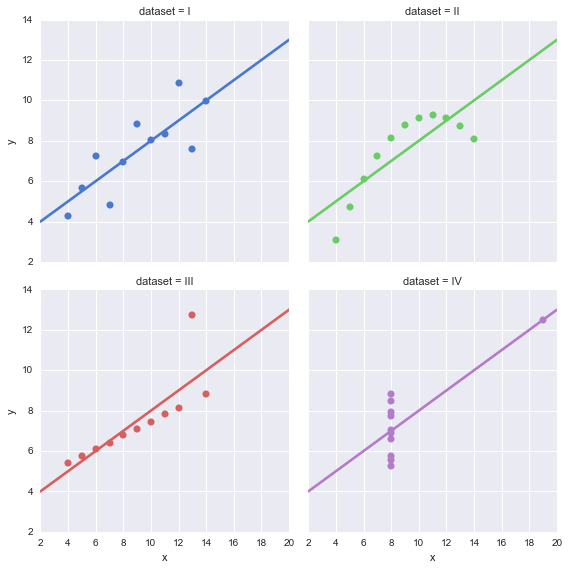

In [2]:
# Example taken from the Seaborn documentation
df = seaborn.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
seaborn.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1});

#### Basic Concepts

When working with data visualization you often encounter the terms **exploratory data analysis** and **explanatory data visualization**. The first could be described as a conversation between you and your data, the latter a conversation between your data and your audience.

##### Data types 

* Numeric (E.g. age expectancy)
* Categorical (E.g. geographic region)
* Time-series

##### Time-Series

In [14]:
# Find/Make time-series example

##### Visual Encodings

Visual encodings are a mapping from data to display elements. Visual encondings ranked by effectivness:

* Position
* Length
* Orientation
* Size
* Volume
* Color

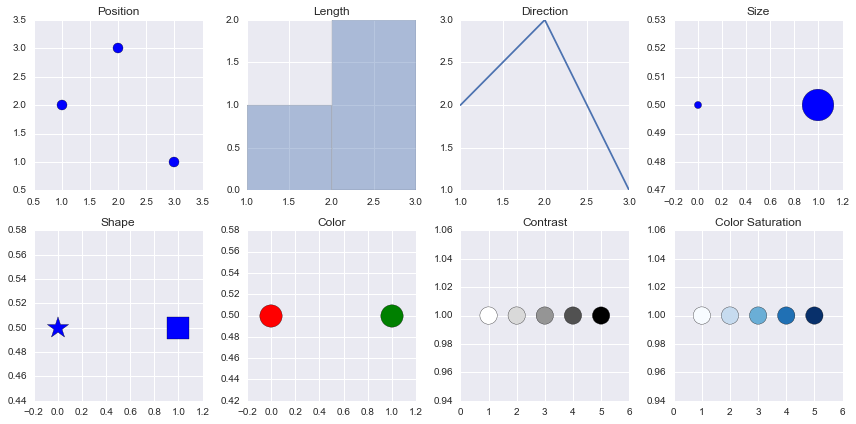

In [10]:
# Make more aesthetic
plt.figure(figsize=(12,6))
%run visual_encodings.py

### Plot Types

#### Exploratory Data Analysis (In Python)

* Titanic Example?

#### Explanatory Data Visualizations

* Show some examples with D3.js

### Dashboards

** Qlik Sense Demo? **

### Eco-System

** Examples of Companies? **

- Qlik
- Tablau
- SAS

## Analytics

### History up to current state of affairs
### Formal Definitions(s)

Many algorithms are today classified as “machine learning.” These algorithms share the goal of extracting information from data. All algorithms for analysis of data are designed to produce a useful summary of the data, from which decisions are made. However, algorithms called “machine learning” not only summarize our data; they are perceived as learning a model or classifier from the data, and thus discover something about data that will be seen in the future.

> A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. -- Tom Mitchell

### Basic Concepts in Python

 #### Supervised Learning: Regression and Classification

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features.

> Would like to do prediction: estimate a function f(x) so that y = f(x)

Where y can be:
- Real number (regression)
- Categorical (classification)
- Complex object (Ranking of objects, Parse tree, etc.)

Supervised learning can be broken down into two categories, <b>classification</b> and <b>regression</b>. In classification, the label is discrete, while in regression, the label is continuous. For example classifying if an email is spam or not is a classification problem: the label is from two categories (spam and not spam). We might wish to estimate housing prices: this would be a regression problem, because the label **price** is a continuous quantity.
 
##### Regression

One of the simplest examples of regression is fitting a straight line to the data.

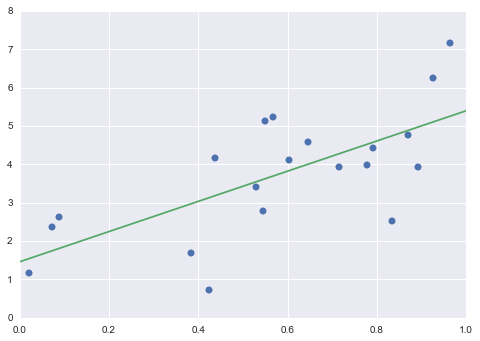

In [3]:
from sklearn.linear_model import LinearRegression

# Generate test data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

# Plot Data
plt.plot(X.squeeze(), y, 'o')

# Plot Regression line
plt.plot(X_fit.squeeze(), y_fit);

Scikit-learn also has some more sophisticated models, which can respond to finer features in the data:

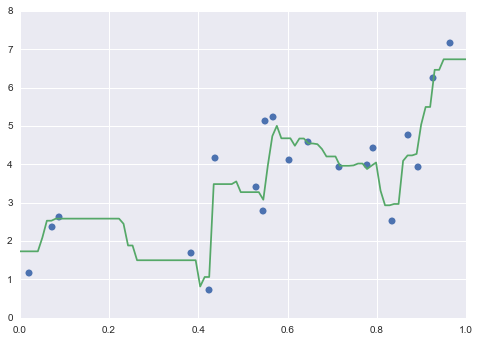

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model
model = RandomForestRegressor()
model.fit(X, y)

X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

##### Classification
  
  There are many supervised learning algorithms available; here we'll introduce one of the most powerful and interesting methods: Support Vector Machines (SVMs).

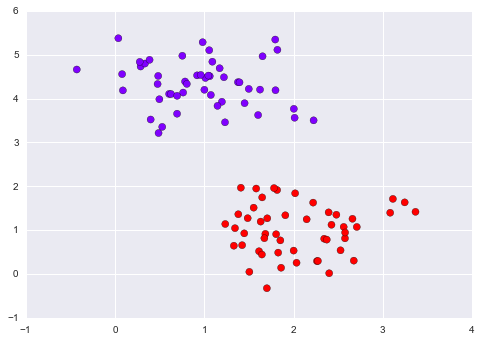

In [16]:
from sklearn.datasets.samples_generator import make_blobs

# Generate isotropic Gaussian blobs for clustering
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.55)

# Plot the data, the label determines the color
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A discriminative classifier attempts to draw a line between the two sets of data. However, it is possible to come up with a large set of lines that separate the clusters successfully. Which of the following lines is the **best** one?

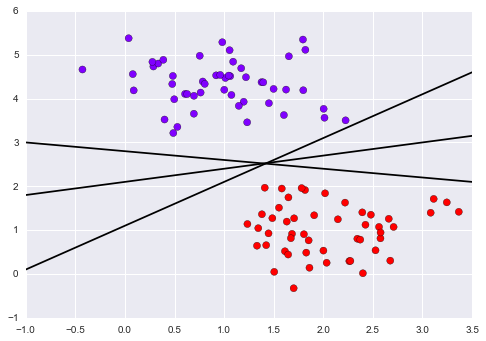

In [17]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Our endpoints
xfit = np.linspace(-1, 3.5)

# Three lines that successfully separate the data
for a, b in [(1.0, 1.1), (0.3, 2.1), (-0.2, 2.8)]:
    #Plot the line y = ax + b
    plt.plot(xfit, a * xfit + b, '-k')

# Limit the x-axis
plt.xlim(-1, 3.5);

Lets see what line a support vector machine would chooce

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) i

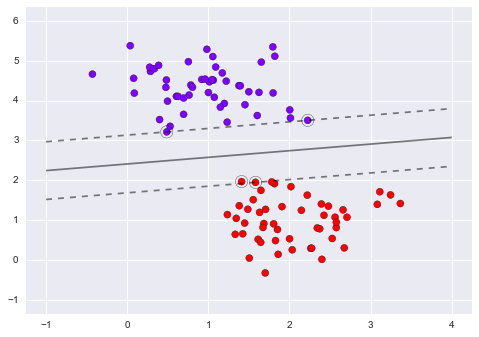

In [18]:
from sklearn.svm import SVC

kernel = ['linear', 'poly', 'rbf']

# Initialize the SVC classifier
clf = SVC(kernel='linear')

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', zorder=10)
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
# Fit the SVC classifier
clf.fit(X, y)

# Generate test data
X_test = np.linspace(-1, 3.5, 50)[:, None]

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Plot SVC decision boundary
plot_svc_decision_function(clf);

### Kernels

Where SVM gets incredibly exciting is when it is used in conjunction with kernels. For the following example it is not possible to linearly separate the data.

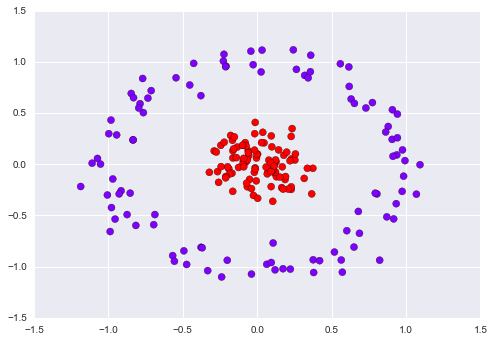

In [19]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(200, factor=.2, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

One way we can adjust this is to apply a kernel, which is some functional transformation of the input data. For example, one simple model we could use is a **radial basis function**

In [20]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

Gives us the following new dataset.

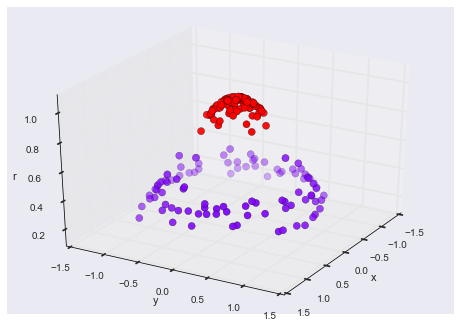

In [21]:
def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[0, 90], azip=(0, 180));

Lets slice it

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) i

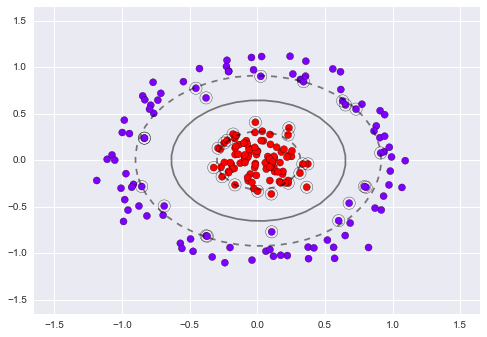

In [26]:
clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf);

#### Multi-Class Problem

What then if you have multiple classes? (Give examples)

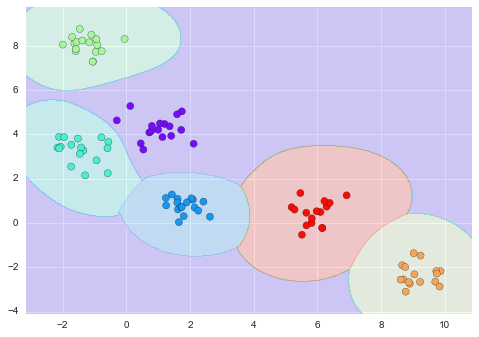

In [25]:
def plot_multi_class(kernel='linear', centers=4):
    X, y = make_blobs(n_samples=100, centers=centers, random_state=0, cluster_std=0.5)
    clf = SVC(kernel=kernel).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
interact(plot_multi_class, kernel=['linear', 'poly', 'rbf'], centers=[2, 10])

### Unsupervised Learning: Dimensionality Reduction and Clustering

In machine learning, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the examples given to the learner are unlabeled, there is no error or reward signal to evaluate a potential solution. This distinguishes unsupervised learning from supervised learning

#### Clustering

> Clustering is the process of examining a collection of “points,” and grouping
the points into “clusters” according to some distance measure.

The goal is that points in the same cluster have a small distance from one another, while points in different clusters are at a large distance from one another. In this section we will take a look at K-Means Clustering. K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

Market segmentation is a typical clustering problem. Every marketing offering will not be right for every customer. Segmentation is a way of organizing your customers into groups with similar traits, product preferences or expectations. Once the segments are identified, marketing messages and products can be customized for each segments.

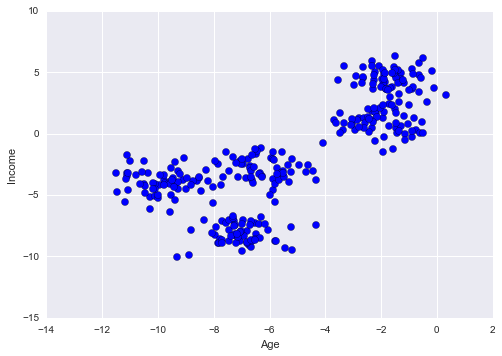

In [27]:
from sklearn.datasets.samples_generator import make_blobs

# Generate clusters
X, y = make_blobs(n_samples=300, centers=5, random_state=1, cluster_std=0.90)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel("Age")
plt.ylabel("Income");

You can probably see from the data that we have five different clusters. Lets implement K-Means and see the result when varying the number of predifined clusters.

Cluster Centers
[[-7.73469424 -4.99829998]
 [-1.84377055  2.68576531]]


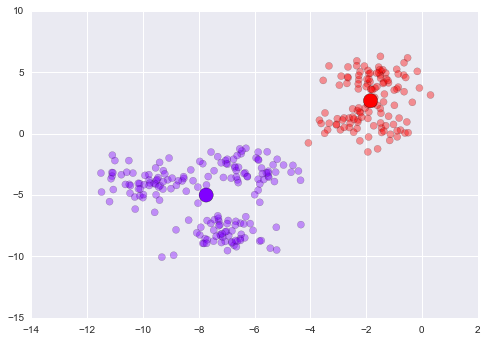

In [28]:
from sklearn.cluster import KMeans

def plot_clusters(num_clusters=2):
    # KMeans with 4 Clusters
    k_means = KMeans(num_clusters)
    # Fit the model on the attributes
    k_means.fit(X)
    # Predict the labels for each point
    y_pred = k_means.predict(X)
    # Get the cluster centers
    mu = k_means.cluster_centers_
    # Plot the result
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='rainbow', alpha=0.4);
    plt.scatter(mu[:, 0], mu[:, 1], s=200, c=np.unique(y_pred), cmap='rainbow')
    print("Cluster Centers")
    print(mu)

interact(plot_clusters, num_clusters=[1, 10]);

### Some Cool Examples of Machine Learning in Practice
### Eco-System

** Trends **

startups shifting away from building broad technology platforms to focusing on solving specific business problems.

With the focus moving from “machine intelligence as magic box” to delivering real value immediately, there are more ways to bring a machine intelligence startup to market.

## Closing Remarks

### "Pretty Cool Community"
### The market will be needing more data scientists (McKinsey Report)
### Questions?

## References

* https://www.oreilly.com/ideas/insightful-applications-the-next-inflection-in-big-data
* https://www.oreilly.com/ideas/cassandra-data-modeling
* https://www.oreilly.com/ideas/rachel-kalmar-on-data-ecosystems
* https://www.oreilly.com/ideas/delivering-data-as-you-like-it-with-self-service
* https://www.oreilly.com/ideas/the-current-state-of-machine-intelligence-2-0
* https://www.oreilly.com/ideas/approaching-big-data-from-a-business-perspective
* https://www.oreilly.com/ideas/nosql-technologies-are-built-to-solve-business-problems-not-just-wrangle-big-data
* https://www.oreilly.com/ideas/building-a-business-that-combines-human-experts-and-data-science-2
* https://www.oreilly.com/ideas/compressed-representations-in-the-age-of-big-data
* https://www.oreilly.com/ideas/the-world-beyond-batch-streaming-102
* https://www.oreilly.com/ideas/transactional-streaming-if-you-can-compute-it-you-can-probably-stream-it
* https://www.oreilly.com/ideas/streaming-data-stream-processing-information
* https://www.oreilly.com/ideas/educating-data
* https://www.oreilly.com/ideas/i-heart-logs-realtime-stream-processing
* https://www.oreilly.com/ideas/10-data-trends-on-our-radar-for-2016